Dependiencies


In [4]:
pip install geopandas

In [5]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import timedelta
from sklearn import metrics

sns.set_style('whitegrid')

# Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# MLP Regression
from sklearn.neural_network import MLPRegressor
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Neural Networks
import math
from keras.models import Sequential
from keras.layers import Dense
from statistics import mean



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [6]:
df = pd.read_csv('covid_19_activity.csv')
df.head(10)

,people_positive_cases_count,county_name,report_date,province_state_name,continent_name,data_source_name,people_death_new_count,county_fips_number,country_alpha_3_code,country_short_name,country_alpha_2_code,people_positive_new_cases_count,people_death_count
0,0,Autauga,2020-01-21,Alabama,America,New York Times,0,1001.0,USA,United States,US,0,0
1,0,Baldwin,2020-01-21,Alabama,America,New York Times,0,1003.0,USA,United States,US,0,0
2,0,Bibb,2020-01-21,Alabama,America,New York Times,0,1007.0,USA,United States,US,0,0
3,0,Blount,2020-01-21,Alabama,America,New York Times,0,1009.0,USA,United States,US,0,0
4,0,Calhoun,2020-01-21,Alabama,America,New York Times,0,1015.0,USA,United States,US,0,0
5,0,Chambers,2020-01-21,Alabama,America,New York Times,0,1017.0,USA,United States,US,0,0
6,0,Escambia,2020-01-21,Alabama,America,New York Times,0,1053.0,USA,United States,US,0,0
7,0,Etowah,2020-01-21,Alabama,America,New York Times,0,1055.0,USA,United States,US,0,0
8,0,Franklin,2020-01-21,Alabama,America,New York Times,0,1059.0,USA,United States,US,0,0
9,0,Greene,2020-01-21,Alabama,America,New York Times,0,1063.0,USA,United States,US,0,0


In [7]:
df.tail(10)

,people_positive_cases_count,county_name,report_date,province_state_name,continent_name,data_source_name,people_death_new_count,county_fips_number,country_alpha_3_code,country_short_name,country_alpha_2_code,people_positive_new_cases_count,people_death_count
561892,1802,NaN,2020-05-06,NaN,America,European Centre for Disease Prevention and Con...,4,NaN,BOL,Bolivia,BO,121,86
561893,0,NaN,2020-01-31,NaN,Africa,European Centre for Disease Prevention and Con...,0,NaN,BWA,Botswana,BW,0,0
561894,313,NaN,2020-04-22,NaN,Europe,European Centre for Disease Prevention and Con...,0,NaN,MNE,Montenegro,ME,1,5
561895,3,NaN,2020-02-15,NaN,Europe,European Centre for Disease Prevention and Con...,0,NaN,ITA,Italy,IT,0,0
561896,115,NaN,2020-03-19,NaN,Europe,European Centre for Disease Prevention and Con...,0,NaN,ARM,Armenia,AM,37,0
561897,1520,NaN,2020-05-29,NaN,Europe,European Centre for Disease Prevention and Con...,0,NaN,SVK,Slovakia,SK,5,28
561898,14,NaN,2020-04-15,NaN,America,European Centre for Disease Prevention and Con...,0,NaN,KNA,Saint Kitts and Nevis,KN,2,0
561899,0,NaN,2020-01-25,NaN,Europe,European Centre for Disease Prevention and Con...,0,NaN,DEU,Germany,DE,0,0
561900,3544,NaN,2020-03-27,NaN,Europe,European Centre for Disease Prevention and Con...,17,NaN,PRT,Portugal,PT,549,60
561901,2547,NaN,2020-05-13,NaN,Asia,European Centre for Disease Prevention and Con...,0,NaN,UZB,Uzbekistan,UZ,38,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561902 entries, 0 to 561901
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   people_positive_cases_count      561902 non-null  int64  
 1   county_name                      520539 non-null  object 
 2   report_date                      561902 non-null  object 
 3   province_state_name              522401 non-null  object 
 4   continent_name                   561902 non-null  object 
 5   data_source_name                 561902 non-null  object 
 6   people_death_new_count           561902 non-null  int64  
 7   county_fips_number               511354 non-null  float64
 8   country_alpha_3_code             561902 non-null  object 
 9   country_short_name               561902 non-null  object 
 10  country_alpha_2_code             561713 non-null  object 
 11  people_positive_new_cases_count  561902 non-null  int64  
 12  pe

In [9]:
df.describe()

,people_positive_cases_count,people_death_new_count,county_fips_number,people_positive_new_cases_count,people_death_count
count,5.619020e+05,561902.000000,511354.000000,561902.000000,561902.000000
mean,9.226999e+02,0.949965,30334.435990,20.345617,53.722841
std,1.352439e+04,22.516851,15223.342422,393.181616,948.522952
min,0.000000e+00,-5503.000000,1001.000000,-55458.000000,0.000000
25%,0.000000e+00,0.000000,18157.000000,0.000000,0.000000
50%,3.000000e+00,0.000000,29134.000000,0.000000,0.000000
75%,5.000000e+01,0.000000,45083.000000,1.000000,1.000000
max,1.603055e+06,5541.000000,56045.000000,55593.000000,64867.000000


Dropping unnecessery column and cleaning datas

In [10]:
# comment 'df.drop(...) line after first program run' 
df.drop(['county_name','county_fips_number', 'province_state_name', 'data_source_name', 'country_alpha_2_code'], axis=1, inplace = True)
df.rename(columns={'country_short_name':'country',
                   'continent_name': 'continent',
                   'report_date': 'date',
                   'people_positive_new_cases_count': 'positive_per_day',
                   'people_positive_cases_count': 'positive_total',
                   'people_death_new_count': 'death_per_day',
                   'people_death_count': 'death_total',
                   'country_alpha_3_code': 'iso_a3'},inplace=True)
df.date = pd.to_datetime(df.date)
df.sort_values(['continent','country','date'], axis=0, inplace=True)
df.head(10)

,positive_total,date,continent,death_per_day,iso_a3,country,positive_per_day,death_total
548454,0,2019-12-31,Africa,0,DZA,Algeria,0,0
500329,0,2020-01-01,Africa,0,DZA,Algeria,0,0
560206,0,2020-01-02,Africa,0,DZA,Algeria,0,0
530039,0,2020-01-03,Africa,0,DZA,Algeria,0,0
530430,0,2020-01-04,Africa,0,DZA,Algeria,0,0
531348,0,2020-01-05,Africa,0,DZA,Algeria,0,0
550251,0,2020-01-06,Africa,0,DZA,Algeria,0,0
496175,0,2020-01-07,Africa,0,DZA,Algeria,0,0
530126,0,2020-01-08,Africa,0,DZA,Algeria,0,0
557141,0,2020-01-09,Africa,0,DZA,Algeria,0,0


In [11]:
df.tail(10)


,positive_total,date,continent,death_per_day,iso_a3,country,positive_per_day,death_total
561216,11,2020-06-27,Oceania,0,PNG,Papua New Guinea,0,0
516835,11,2020-06-28,Oceania,0,PNG,Papua New Guinea,0,0
527654,11,2020-06-29,Oceania,0,PNG,Papua New Guinea,0,0
554712,11,2020-06-30,Oceania,0,PNG,Papua New Guinea,0,0
535639,11,2020-07-01,Oceania,0,PNG,Papua New Guinea,0,0
552973,11,2020-07-02,Oceania,0,PNG,Papua New Guinea,0,0
499872,11,2020-07-03,Oceania,0,PNG,Papua New Guinea,0,0
496435,11,2020-07-04,Oceania,0,PNG,Papua New Guinea,0,0
555020,11,2020-07-05,Oceania,0,PNG,Papua New Guinea,0,0
513870,11,2020-07-06,Oceania,0,PNG,Papua New Guinea,0,0


EDA

In [12]:
# Number of countries in dataset
no_country = df.country.unique().size
print(f'Number of countries in dataset: {no_country}')

# Range of reported dates
min_data = df.date.min()
max_data = df.date.max()
print(f'Data was reported from {min_data} to {max_data}')

# # below lines were created because United States apeares in dataframe multiple times (different cities and states)
temp_df = df.groupby(['country', 'continent'], as_index=False).agg({"positive_per_day": "sum"})
temp_death_df = df.groupby(['country', 'continent'], as_index=False).agg({"death_per_day": "sum"})
temp_df.sort_values(['continent','country'], axis=0, inplace=True)
temp_death_df.sort_values(['continent','country'], axis=0, inplace=True)
temp_df.rename(columns={'positive_per_day': 'positive_total'}, inplace = True)
temp_death_df.rename(columns={'death_per_day': 'death_total'}, inplace = True)
print(temp_df.head())

Number of countries in dataset: 205
Data was reported from 2019-12-31 00:00:00 to 2020-07-06 00:00:00
         country continent  positive_total
2        Algeria    Africa           15941
4         Angola    Africa             346
20         Benin    Africa            1199
26      Botswana    Africa             275
31  Burkina Faso    Africa             987


In [13]:
# average positive cases in each continents
continents = temp_df.continent.unique()
for continent in continents:
    temp2_df = temp_df.loc[temp_df.continent == continent]
    print('-'*80)
    print(f'average number of positive cases in {continent}:  {temp2_df.positive_total.mean():.2f}')

--------------------------------------------------------------------------------
average number of positive cases in Africa:  8692.62
--------------------------------------------------------------------------------
average number of positive cases in America:  126138.45
--------------------------------------------------------------------------------
average number of positive cases in Asia:  58869.77
--------------------------------------------------------------------------------
average number of positive cases in Europe:  46009.22
--------------------------------------------------------------------------------
average number of positive cases in Oceania:  1624.00


In [14]:
temp3_df = df.groupby(['country', 'continent'], as_index=False).agg({"death_per_day": "sum"})
temp3_df.sort_values(['continent','country'], axis=0, inplace=True)
temp3_df.rename(columns={'death_per_day': 'death_total'}, inplace = True)

In [15]:
# average death count in each continents:
for continent in continents:
    temp2_df = temp3_df.loc[temp3_df.continent == continent]
    print('-'*800)
    print(f'average number of fatalities in {continent}:  {temp2_df.death_total.mean():.2f}')

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
average number of fatalities in Africa:  206.78
-------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
# max values of positive cases in each continents:
for continent in continents:
    temp2_df = temp_df.loc[temp_df.continent == continent]
    print('-'*800)
    print(f'Maximum number of positive cases in {continent}:  {temp2_df.positive_total.max()}   {temp2_df["country"].loc[temp2_df.positive_total == temp2_df.positive_total.max()].unique()}')



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Maximum number of positive cases in Africa:  196750   ['South Africa']
--------------------------------------------------------------------------------------------------------------------------------

In [17]:
# max values of fatalities in each continents:
for continent in continents:
    temp2_df = temp3_df.loc[temp3_df.continent == continent]
    print('-'*800)
    print(f'Maximum number of fatalities in {continent}:  {temp2_df.death_total.max()}   {temp2_df["country"].loc[temp2_df.death_total == temp2_df.death_total.max()].unique()}')


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Maximum number of fatalities in Africa:  3343   ['Egypt']
---------------------------------------------------------------------------------------------------------------------------------------------

Data visualisation on map - world

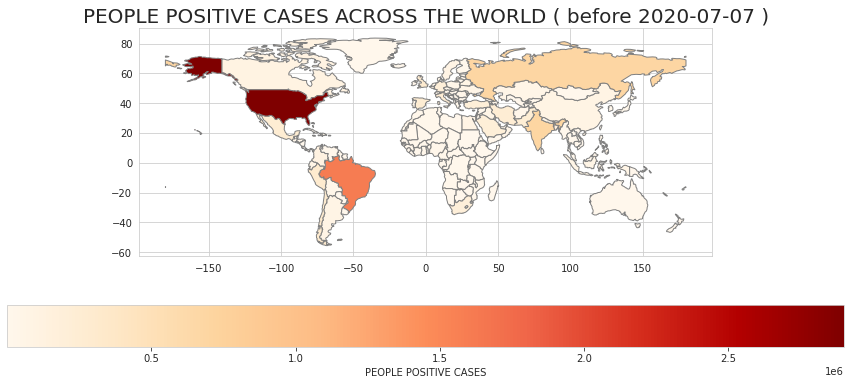

In [18]:
# construction of object 'world' and Antarctica removal
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]
# changing the column name from COUNTRY_ALPHA_3_CODE to iso_3 for dataframe joining
vis_temp_df = df[['iso_a3', 'positive_per_day']]
# grouping by 3 letter codes so i.e. America instead of a few thousand lines has just one with the sum of cases
vis_temp_df = vis_temp_df.groupby('iso_a3', as_index=False).agg({"positive_per_day": "sum"})
vis_world_df = pd.merge(vis_temp_df, world, on='iso_a3', how='inner', sort=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
gdf = geopandas.GeoDataFrame(vis_world_df)
gdf.plot(column='positive_per_day',edgecolor=u'gray', cmap='OrRd', ax=ax, legend=True, legend_kwds={'label': "PEOPLE POSITIVE CASES",
                                                                                                 'orientation': "horizontal"})
plt.title('PEOPLE POSITIVE CASES ACROSS THE WORLD ( before 2020-07-07 )', fontsize=20)
plt.show()


Data visualisation on map - europe

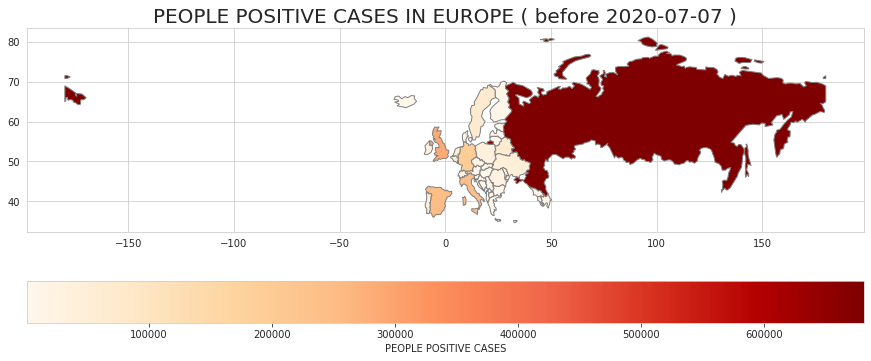

In [19]:
# temp dataframe
vis_eu_temp_df = df[['iso_a3', 'positive_per_day']].loc[df.continent == 'Europe']
vis_eu_temp_df
vis_eu_temp_df = vis_eu_temp_df.groupby('iso_a3', as_index=False).agg({"positive_per_day": "sum"})
vis_europe_df = pd.merge(vis_eu_temp_df, world, on='iso_a3', how='inner', sort=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
gdf = geopandas.GeoDataFrame(vis_europe_df)
gdf.plot(column='positive_per_day',edgecolor=u'gray', cmap='OrRd', ax=ax, legend=True, legend_kwds={'label': "PEOPLE POSITIVE CASES",
                                                                                                 'orientation': "horizontal"})
plt.title('PEOPLE POSITIVE CASES IN EUROPE ( before 2020-07-07 )', fontsize=20)
plt.show()


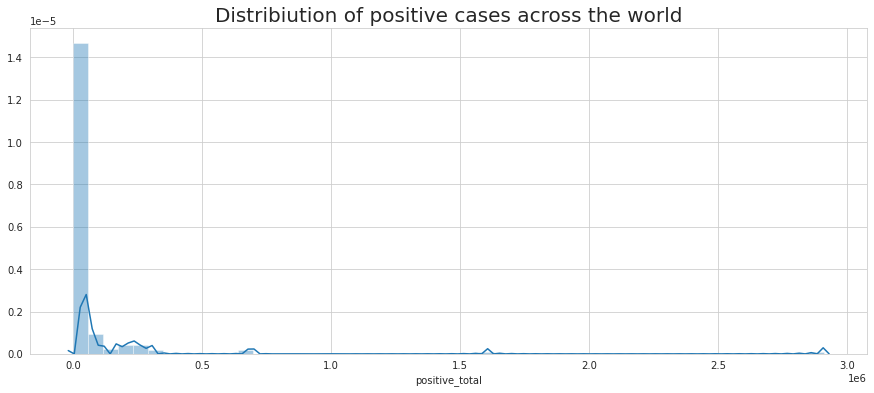

In [20]:
# Histogram of positive cases across the world
plt.figure(figsize=(15,6))
hist = sns.distplot(temp_df['positive_total'], bins=50)
plt.title('Distribiution of positive cases across the world', fontsize=20)
plt.show()

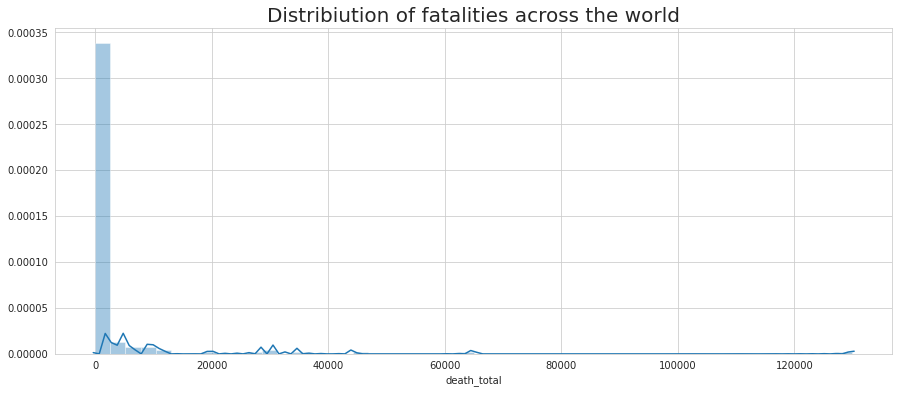

In [21]:
# Histogram of fatalities per day across the world
plt.figure(figsize=(15,6))
hist = sns.distplot(temp_death_df['death_total'], bins=50)
plt.title('Distribiution of fatalities across the world', fontsize=20)
plt.show()

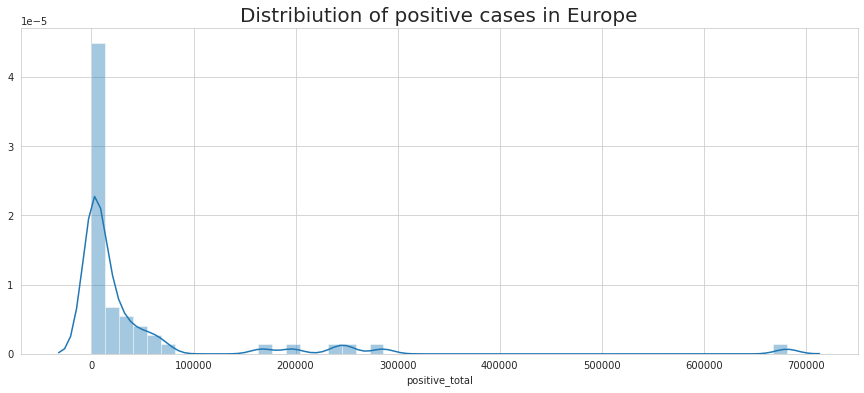

In [22]:
# histogram of positive cases in Europe
plt.figure(figsize=(15,6))
hist = sns.distplot(temp_df['positive_total'].loc[temp_df['continent'] == 'Europe'], bins=50)
plt.title('Distribiution of positive cases in Europe', fontsize=20)
plt.show()


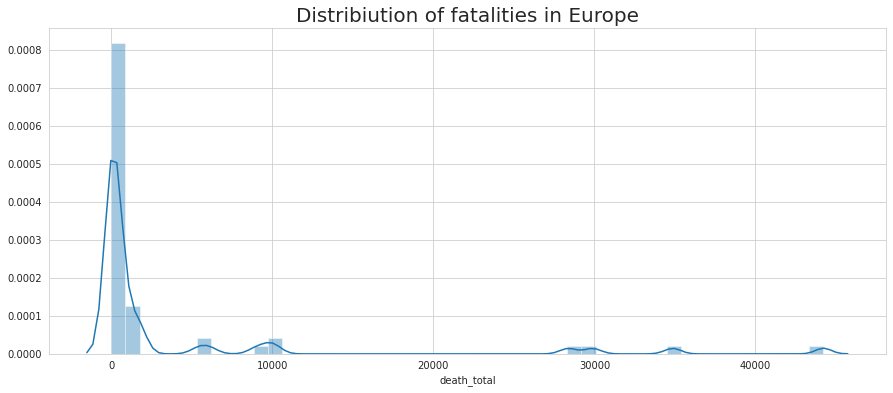

In [23]:
# histogram of fatalities in Europe
plt.figure(figsize=(15,6))
hist = sns.distplot(temp_death_df['death_total'].loc[temp_death_df['continent'] == 'Europe'], bins=50)
plt.title('Distribiution of fatalities in Europe', fontsize=20)
plt.show()


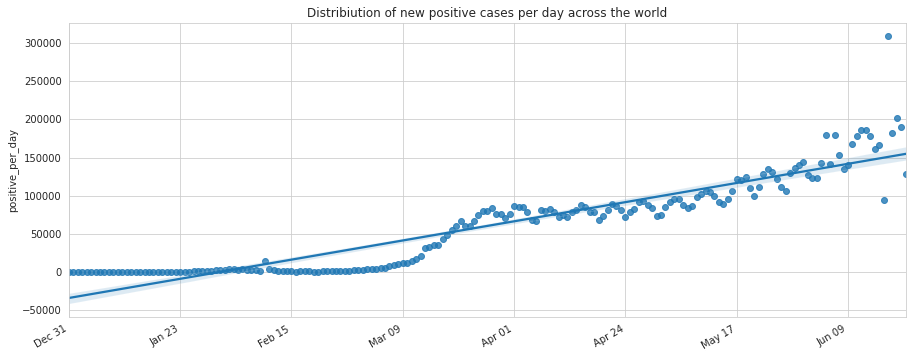

In [24]:
# regression of new positive cases per day across the world
temp4_df = df.groupby('date', as_index=False).agg({"positive_per_day": "sum"})
temp4_df.date = pd.to_datetime(temp4_df.date)
plt.figure(figsize=(15,6))
regplot = sns.regplot(x=np.arange(len(temp4_df['positive_per_day'])),y=temp4_df['positive_per_day'])
ticklabels = [item.strftime('%b %d') for item in temp4_df.date[::int(len(temp4_df.date)/8)]]
regplot.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.title('Distribiution of new positive cases per day across the world')
regplot.set_xticklabels(ticklabels)
plt.show()

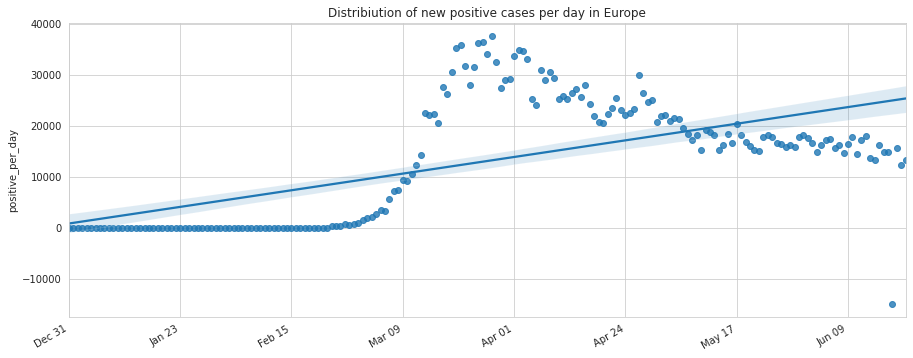

In [25]:
# regression of new positive cases per day in Europe
temp5_df = df[df.continent == 'Europe'].groupby('date', as_index=False).agg({"positive_per_day": "sum"})
temp5_df.date = pd.to_datetime(temp5_df.date)
plt.figure(figsize=(15,6))
regplot = sns.regplot(x=np.arange(len(temp5_df)),y=temp5_df['positive_per_day'])
ticklabels = [item.strftime('%b %d') for item in temp5_df.date[::int(len(temp5_df.date)/8)]]
regplot.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.title('Distribiution of new positive cases per day in Europe')
regplot.set_xticklabels(ticklabels)
plt.show()


Poland

In [26]:
# Regression of data in Poland

def regression_Poland(date, column):
  date = pd.to_datetime(date)
  df.date = pd.to_datetime(df.date)
  df.sort_values(by='date', inplace = True)
  plt.figure(figsize=(15,6))
  plt.plot(df[(df.country =='Poland') & (df.date < date)].date,df[(df.country =='Poland') & (df.date < date)][column], label='before')
  plt.plot(df[(df.country =='Poland') & (df.date >= date)].date,df[(df.country =='Poland') & (df.date >= date)][column], label='after')
  plt.legend()
  plt.xlabel('Day', fontsize=15)
  plt.ylabel('Cases', fontsize=15)
  plt.title(f'Regression of {column} cases in Poland before and after {date}', fontsize=18)
  plt.show()

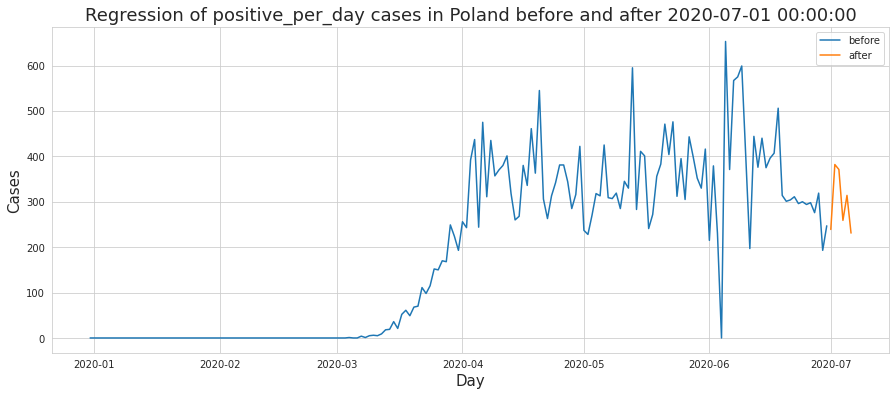

In [27]:
regression_Poland('2020-07-01', 'positive_per_day')

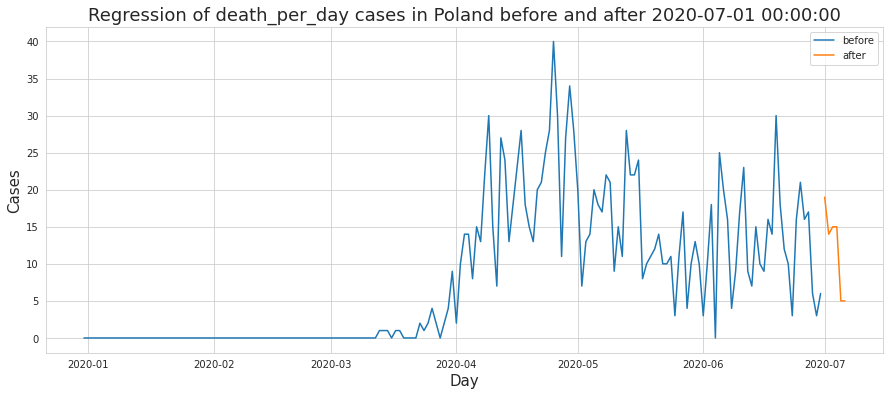

In [28]:
regression_Poland('2020-07-01', 'death_per_day')

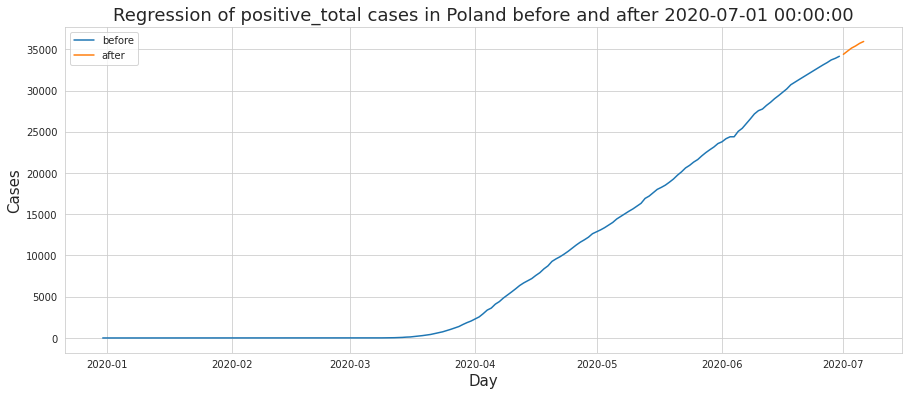

In [29]:
regression_Poland('2020-07-01', 'positive_total')

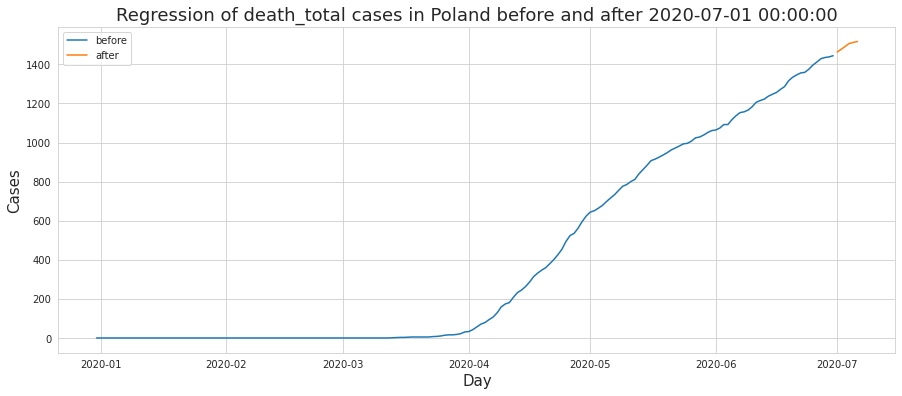

In [30]:
regression_Poland('2020-07-01', 'death_total')

Linear Regression and MLP projection

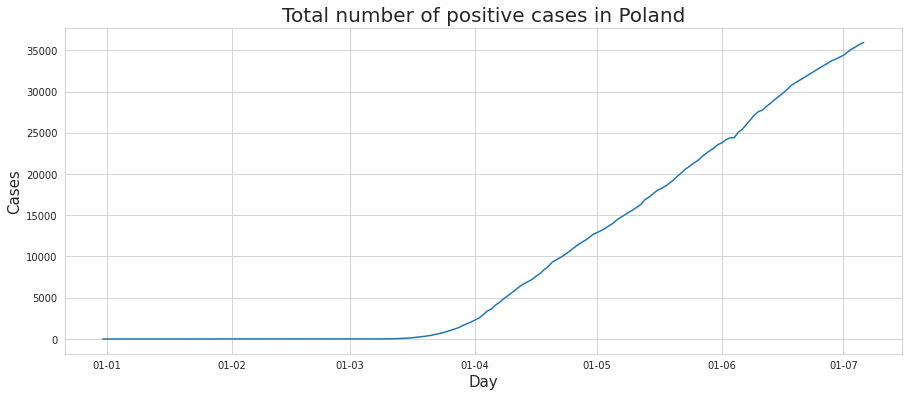

In [31]:
df_poland = df[df.country == 'Poland']

annotate_day = '2020-07-01'
text_location = '2020-07-03'
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
myFmt = mdates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(myFmt)
plt.plot(df_poland.date, df_poland.positive_total)
plt.title('Total number of positive cases in Poland', fontsize = 20)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.grid(True)
plt.show()

In [32]:
# Positive cases prediction
# For better results, data from 2020-04-01 was considered as training data
def projection(regressor, start_date = '2020-04-01', end_date='2020-07-01', start_day_index=90, prediction_term=7, column='positive_total'):
  X = np.array(df_poland[(df_poland.date > start_date) & (df_poland.date < end_date)].date)
  y = np.array(df_poland[column][(df_poland.date > start_date) & (df_poland.date < end_date)])
  day_numbers = []
  for i in range(1, len(X)+1):
      day_numbers.append([i])
  X = day_numbers
  if regressor.casefold() == 'linear regression':
    model = LinearRegression()
  elif regressor.casefold() == 'mlp':
    model = MLPRegressor(solver='lbfgs', learning_rate='adaptive')
  model.fit(X, y)
  # row with index 74 is the equivalent of 2020-06-14 from wich we launch prediction process 
  start_predict_date = start_day_index 
  prediction_term = prediction_term

  X_test = [[i] for i in range(start_predict_date,start_predict_date+prediction_term-1)]
  y_pred = model.predict(X_test)
  y_true = np.array(df_poland[column][(df_poland.date >= end_date)])
  plt.figure(figsize=(15,6))
  plt.text(len(X+X_test)+3-2, y_pred[-2],f'Prediction: {int(y_pred[-2])}', fontsize=15)
  plt.plot(X, df_poland[column][(df_poland.date > start_date) & (df_poland.date < end_date)], label='Train')
  plt.plot(X_test, y_pred, label='Predict')
  temp_list = X+X_test
  x_axis_labels = ['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01']
  plt.xticks(temp_list[::30], x_axis_labels)
  plt.title(f'Projection of {column} cases in Poland after 1st July and prediction for 7th July ({regressor})', fontsize=18)
  plt.xlabel('Day', fontsize=15)
  plt.ylabel(f'{column}', fontsize=15)
  plt.legend()
  plt.grid(True)
  plt.show()
  print(f'RMSE of {regressor} model for {column}:  {np.sqrt( metrics.mean_squared_error(y_true, y_pred)):.2f}')

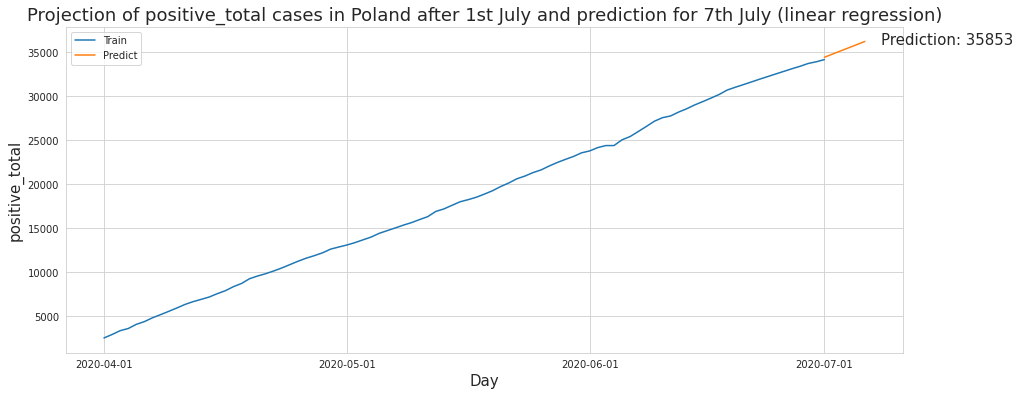

RMSE of linear regression model for positive_total:  126.24


In [33]:
projection(regressor = 'linear regression', column='positive_total')

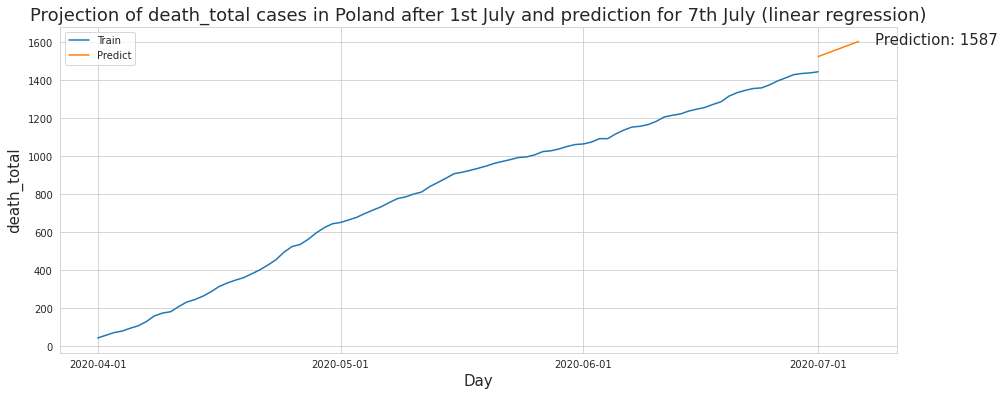

RMSE of linear regression model for death_total:  69.65


In [34]:
projection(regressor = 'linear regression', column='death_total')

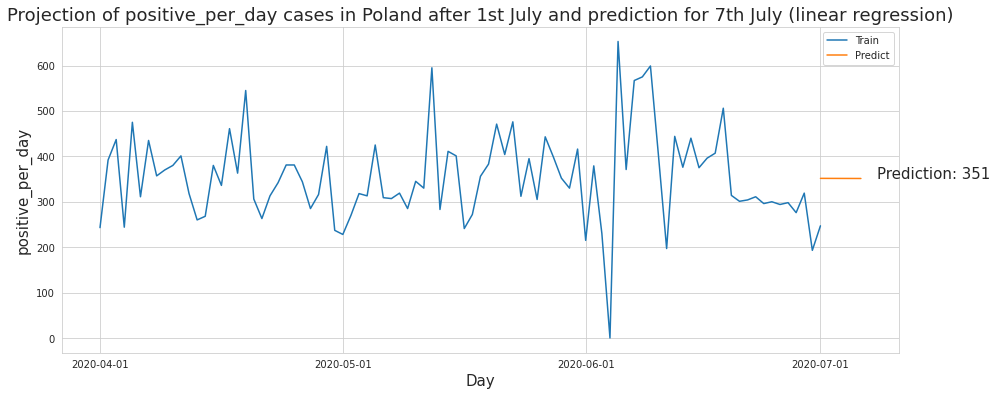

RMSE of linear regression model for positive_per_day:  79.95


In [35]:
projection(regressor = 'linear regression', column='positive_per_day')

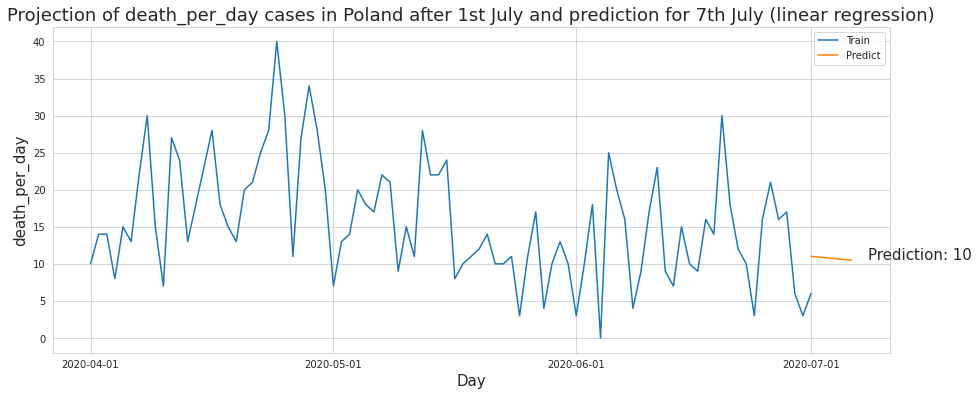

RMSE of linear regression model for death_per_day:  5.34


In [36]:
projection(regressor = 'linear regression', column='death_per_day')

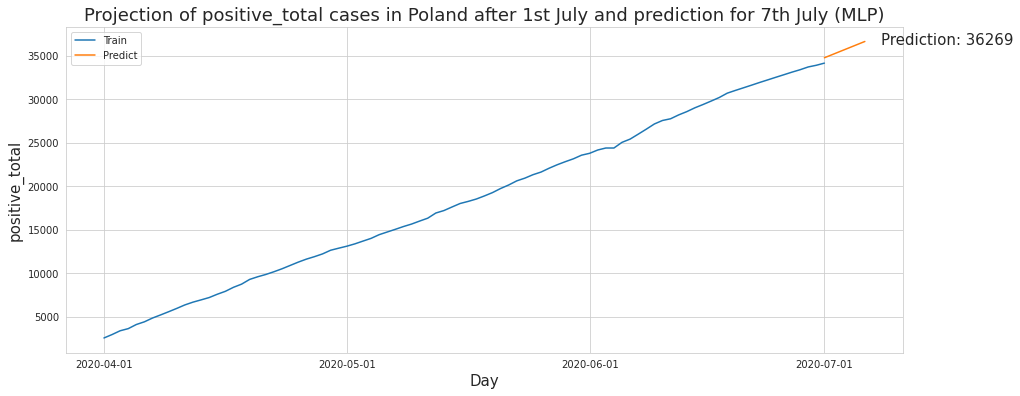

RMSE of MLP model for positive_total:  490.58


In [37]:
projection(regressor = 'MLP', column='positive_total')

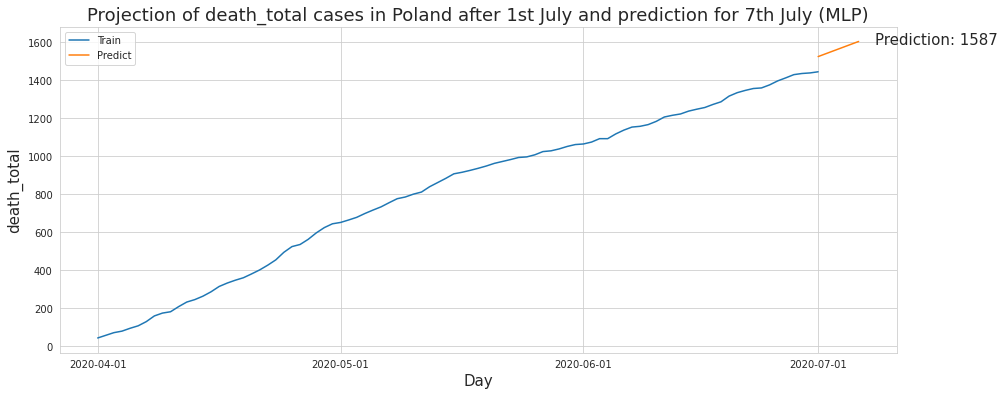

RMSE of MLP model for death_total:  69.73


In [38]:
projection(regressor = 'MLP', column='death_total')

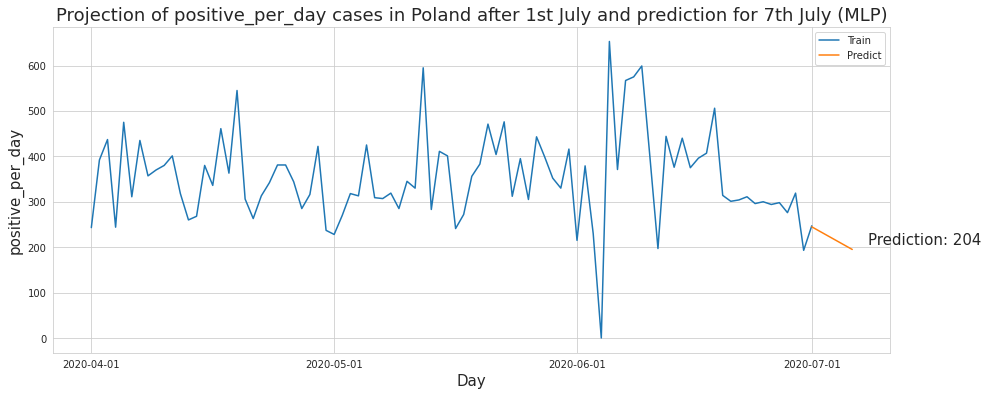

RMSE of MLP model for positive_per_day:  98.49


In [39]:
projection(regressor = 'MLP', column='positive_per_day')

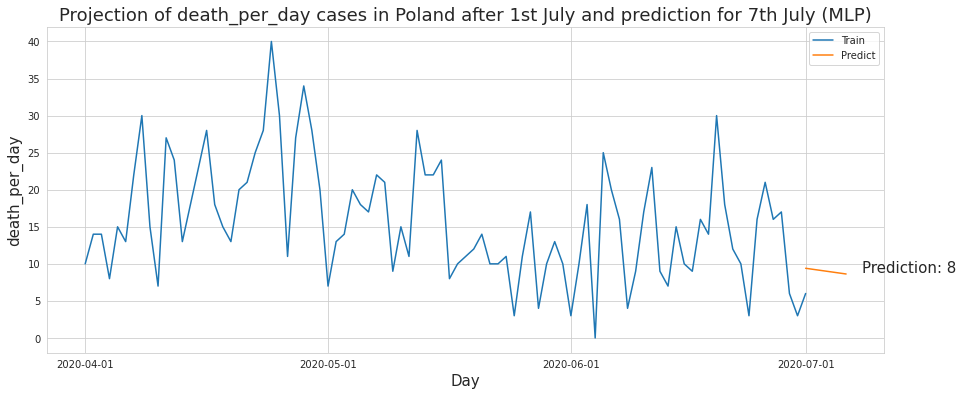

RMSE of MLP model for death_per_day:  5.97


In [40]:
projection(regressor = 'MLP', column='death_per_day')

Deep Learning with Multilayer Perceptron model

In [41]:
def add_dimmension(dataframe, window_width=1):
    dataX, dataY = [], []
    for i in range(len(dataframe) - window_width):
        a = dataframe[i:(i + window_width), 0]
        dataX.append(a)
        dataY.append(dataframe[i + window_width, 0])
    return np.array(dataX), np.array(dataY)

def nn_model(column, window_width=10, optimizer='adam', activation='relu', epochs=1000, batch_size=30):
  # testing smaller dataset from '2020-04-01' (uncoment if necessary)
  # dataset = df_poland[column][df_poland.date >= '2020-04-01']
  dataset = df_poland[column]
  dataset = dataset.values.reshape(len(dataset), 1)
  dataset = dataset.astype('float32')
  # split into train and test sets 70% train 30% test
  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
  # reshape dataset window 10 samples width
  trainX, trainY = add_dimmension(train, window_width)
  testX, testY = add_dimmension(test, window_width)
  # create and fit Multilayer Perceptron model
  model = Sequential()
  model.add(Dense(16, input_dim=window_width, activation = activation))
  model.add(Dense(32, activation = activation))
  model.add(Dense(8, activation = activation))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer = optimizer)
  
  # getting average error from 10 iteration of learning process (uncoment if necessary)
  # temp_rmse_score = []
  # for i in range(10):
  #   model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, verbose=1)
  #   trainScore = model.evaluate(trainX, trainY, verbose=0)
  #   print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
  #   testScore = model.evaluate(testX, testY, verbose=0)
  #   print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
  #   temp_rmse_score.append(np.sqrt(testScore))
  # print(f'Average RMSE of model for {column}: { mean(temp_rmse_score)}')
  model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, verbose=0)
  trainScore = model.evaluate(trainX, trainY, verbose=0)
  print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
  testScore = model.evaluate(testX, testY, verbose=0)
  print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
  # generate predictions for training
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[window_width:len(trainPredict) + window_width, :] = trainPredict
  print(trainPredict.size)
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[-len(testPredict):, :] = testPredict
  # future predictions
  prediction_range = 7
  future_df = testX[-2:]
  for i in range(prediction_range):
    recent_pred = model.predict(future_df[-1].reshape(1, window_width))
    future_df = np.vstack([future_df, [future_df[-1][-9],future_df[-1][-8],future_df[-1][-7],future_df[-1][-6],future_df[-1][-5], future_df[-1][-4], future_df[-1][-3], future_df[-1][-2], future_df[-1][-1], float(recent_pred)]])
  future_dataset = np.vstack([dataset, future_df[-prediction_range:, -1].reshape(prediction_range, 1)])
  futurePredictPlot = np.empty_like(future_dataset)
  futurePredictPlot[:, :] = np.nan
  futurePredictPlot[-prediction_range:, :] = future_df[-prediction_range:, -1].reshape(prediction_range, 1)
  return column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range

def plot_prediction(column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range):
  # plot baseline and predictions
  fig = plt.figure(figsize=(15, 6))
  plt.text(len(dataset)+prediction_range+3,futurePredictPlot[-1],f'Prediction: {int(futurePredictPlot[-1])}', fontsize = 15)
  date_range = pd.date_range(start="2019-12-30", end='2020-06-27').strftime('%Y-%m-%d')
  plt.plot(dataset, label='dataset')
  plt.plot(trainPredictPlot, label='train predict')
  plt.plot(testPredictPlot, label='test predict')
  plt.plot(futurePredictPlot,label='future predict')
  plt.xticks(range(len(future_dataset))[::30], date_range[::30])
  plt.title(f'Projection of {column} cases in Poland after 1st July and prediction for 7th July (Nueral Network)', fontsize=18)
  plt.xlabel('Day', fontsize=15)
  plt.ylabel(f'{column}', fontsize=15)
  fig.autofmt_xdate()
  plt.legend(loc='best')
  plt.show()

Train Score: 28101.80 MSE (167.64 RMSE)
Test Score: 389086.28 MSE (623.77 RMSE)
122


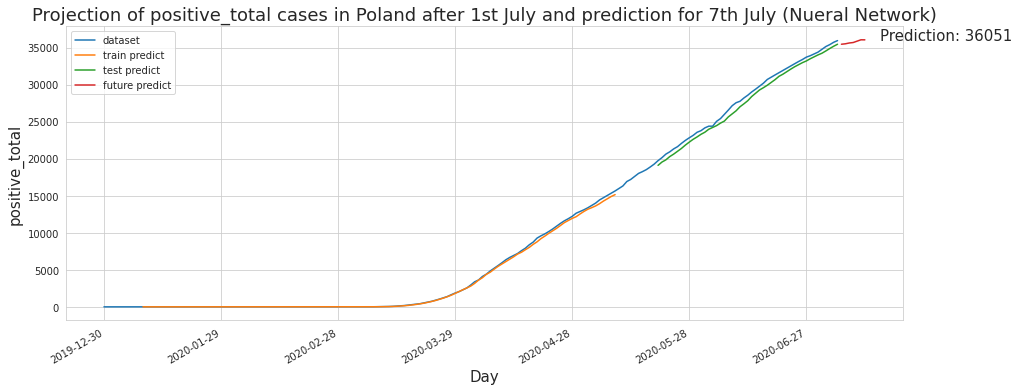

In [55]:
column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range = nn_model('positive_total', batch_size = 30, epochs=1000)
plot_prediction(column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range)

Train Score: 3738.38 MSE (61.14 RMSE)
Test Score: 13952.27 MSE (118.12 RMSE)
122


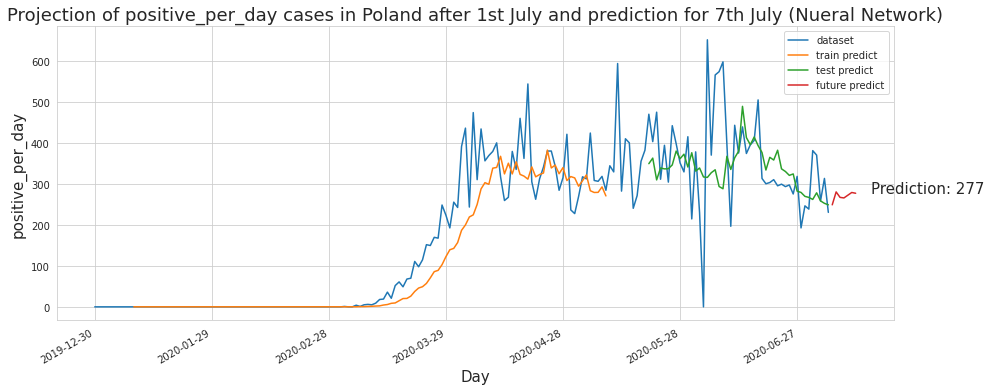

In [63]:
column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range = nn_model('positive_per_day', batch_size = 30, epochs=10)
plot_prediction(column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range)

Train Score: 19.12 MSE (4.37 RMSE)
Test Score: 188.44 MSE (13.73 RMSE)
122


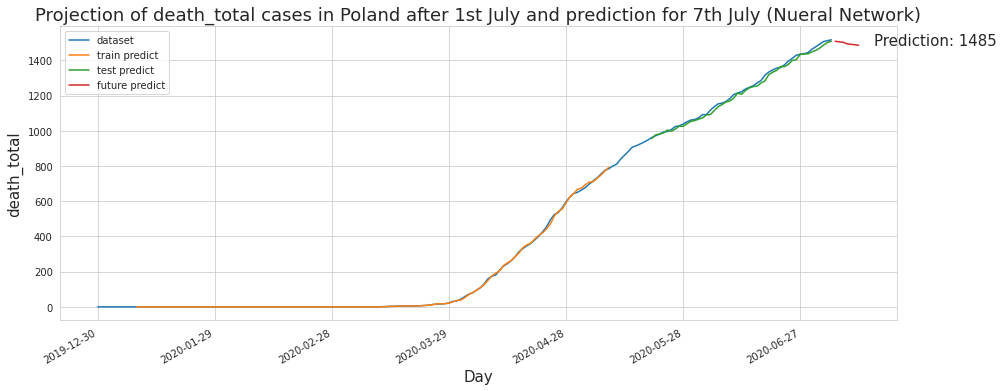

In [48]:
column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range = nn_model('death_total', epochs=500, batch_size=15)
plot_prediction(column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range)

Train Score: 31.93 MSE (5.65 RMSE)
Test Score: 57.76 MSE (7.60 RMSE)
122


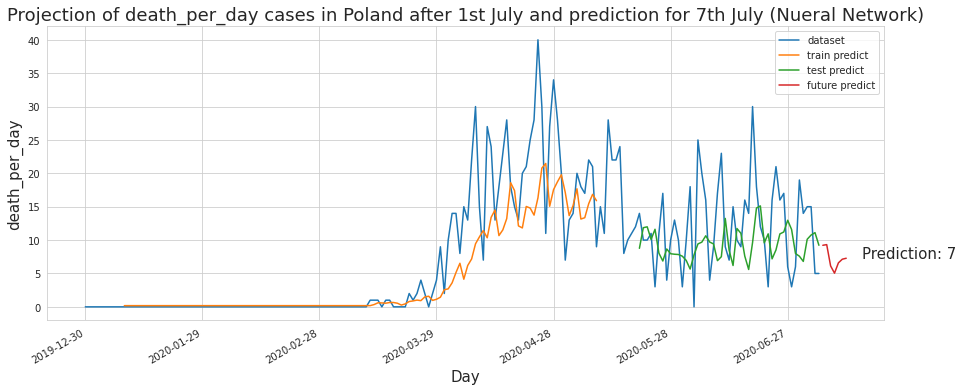

In [56]:
column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range = nn_model('death_per_day', epochs=5, batch_size=10)
plot_prediction(column, dataset, trainPredictPlot, testPredictPlot, futurePredictPlot, future_dataset, prediction_range)